#Actividad IV - Optimización

Esta actividad se enfoca en el uso de un algoritmo de optimización, específicamente un Algoritmo Genético, para resolver un problema de asignación de recursos.

---

##Instrucciones Generales de Entrega

La entrega (grupal o individual, según corresponda) se materializa en un informe donde se contestan las preguntas que se indican en las secciones de "Preguntas", más adelante. Se puede recurrir a ejercicios de otras fuentes, así como al material de clases.

La entrega se realiza en forma de un archivo en formato PDF utilizando la plantilla de informe que está en el sitio del curso. El informe en formato PDF debe ser subido por sólo uno de los integrantes a la tarea correspondiente en el sitio del curso.

Dentro del contenido, se les pide enumerar en orden alfabético los integrantes del grupo y se responden las preguntas, copiando el enunciado respectivo. Por ej:

Pregunta 1)

(Enunciado)

(Respuesta)
...

(*) Sólo si hay problemas en la carga, enviar el PDF a rasandou@uc.cl y cc: ayudante@aiker.ai


##Descripción del contexto y necesidad

Un municipio abrió y difundió un programa de apoyo financiero a proyectos presentados por emprendedores locales. Cada proyecto se describe en una serie de características y ya hubo un comité que evaluó cada uno de ellos y les asignó un puntaje, llamado "Valor", el que refleja el mérito del proyecto en base a varios criterios que no se requiere detallar.

El municipio requiere realizar la asignación de los fondos Fi (donde i corresponde al número de proyecto y Fi es lo que el proyecto solicita), con un presupuesto total de P, considerando que no todos los proyectos podrán ser seleccionados para recibir el fondo solicitado.

Se requiere optimizar la asignación de fondos de financiamiento a diferentes proyectos de innovación presentados por emprendedores, que ya tienen asignado. su respectivo puntaje de valor Vi, es decir, realizar una asignación de fondos a proyectos diferentes, buscando maximizar el valor total entregado, entendiendo que los fondos disponibles están restringidos a P.

Se propone utilizar un algoritmo de optimización que encuentre la asignación ideal, maximizando el valor total generado (la suma de los Vi valores individuales seleccionados), sujeto a que la suma de los fondos respectivos no supere el presupuesto total P.

Función Objetivo: Suma(Vi), donde i es un proyecto seleccionado, sujeto a que la Suma(Fi) <= P.

Nótese que no se busca maximizar la cantidad de proyectos seleccionados o beneficiados, sino que el valor total de los beneficiados.


##Paso 0: Carga de librerías

La librería a utilizar, cuyo nombre es simplemente 'genalg', se documenta y describe en detalle en https://www.rdocumentation.org/packages/GenAlgo/versions/2.2.0/topics/GenAlg


In [1]:
install.packages("genalg")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



---

##Paso 1: Declaración de los datos

Se declara un dataset con 20 proyectos, cada uno con un nombre (proyecto), un valor (valor) y fondo solicitado (fondo). Además se declara el presupuesto total PTot.

In [3]:
# Datos

library(genalg)
library(ggplot2)

# Los proyectos Pi van del 1 al 20
dataset <- data.frame(
    proyecto = c("P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10",
             "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20"),
    valor = c(10, 20, 15, 12, 30, 14, 32, 11, 20, 16, 10, 24, 15, 16, 31, 13, 27, 15, 23, 18),
    fondo = c(3, 5, 8, 4, 5, 1, 8, 4, 7, 5, 4, 6, 7, 4, 5, 1, 9, 3, 6, 5))
PTot <- 40

dataset

# Función objetivo que calcula el "peso" de la solución,
# el que se obtiene de sumar los fondos solicitados.
# Si la solución supera la capacidad PTot se entrega valor 0.
funObjetivo <- function(x) {
    solucion_valores <- x %*% dataset$valor
    solucion_fondos <- x %*% dataset$fondo
    if (solucion_fondos > PTot)
        return(0) else return(-solucion_valores)
}

proyecto,valor,fondo
<chr>,<dbl>,<dbl>
P1,10,3
P2,20,5
P3,15,8
P4,12,4
P5,30,5
P6,14,1
P7,32,8
P8,11,4
P9,20,7


In [4]:
# Ejemplo de cómo una solución particular (1 = el proyecto es seleccionado, 0 no es seleccionado)
# resulta en un valor total y en un costo total

solucion = c(1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1)
dataset[solucion == 1, ]

cat("Valor total: ", solucion %*% dataset$valor, "\n")
cat("Costo total: ", solucion %*% dataset$fondo, " < ", PTot)

,proyecto,valor,fondo
,<chr>,<dbl>,<dbl>
1,P1,10,3
4,P4,12,4
5,P5,30,5
9,P9,20,7
10,P10,16,5
11,P11,10,4
14,P14,16,4
15,P15,31,5
19,P19,23,6


Valor total:  186 
Costo total:  48  <  40

# Ejercicio: ejecutar una optimización

A continuación está el código que realiza la optimización gracias a un algoritmo genético usando la librería mencionada. Se puede ver en las primeras líneas que se declaran algunos parámetros, los que se explican a continuación:

*   **elitismo**: verdadero (T) o falso (F), si se privilegia el cruzamiento (crossover) sólo con los mejores individuos o soluciones o toda la población.
*   **iteraciones**: cantidad de iteraciones que el algoritmo realizará. Mientras más iteraciones, mejor solución potencial, pero también mayor esfuerzo computacional.
*   **tamano_poblacion**: cantidad de soluciones diferentes, creadas aleatoriamente, que se consideran en cada generación.
*   **tasa_mutacion**: probabilidad de que a una solución se le aplique el operador de mutación. Mientras mayor sea, mayor cantidad de mutantes en la nueva generación.

A continuación se declaran otros dos argumentos o parámetros, que no se modifican:

*   tamano: cantidad de proyectos (tamaño o largo del vector solución). (No se modifica)
*   evalFunc: función objetivo, que este caso está declarada más arriba (funObjetivo). (No se modifica)

## Ejercicio 1 (4 puntos)

El ejercicio principal consiste en realizar diferentes ejecuciones de la optimización, cambiando los valores de los 4 primeros parámetros (elitismo, iteraciones, tamano_poblacion, tasa_mutacion), buscando una de estas combinaciones que resulte en los mejores resultados. Para evitar una cantidad excesiva de pruebas, se propone acotar cada parámetro a una serie acotada de valores:

*    elitismo: T o F
*    iteraciones: 10, 15, 20, 40
*    tamano_poblacion: 50, 100, 200, 400
*    tasa_mutacion: 0.01, 0.02, 0.05, 0.1

En el informe se pide acompañar la conclusión de los valores usados para lograr el mejor resultado con una tabla, además de explicar el criterio utilizado para reconocer el mejor resultado.





# Ejemplo de desarrollo(profesor)

In [5]:
# Ejercicio 1: modificar valores de estos 4 parámetros
elitismo = T
iteraciones = 10
tamano_poblacion = 100
tasa_mutacion = 0.02

## No se modifica:
tamano = 20
evalFunc = funObjetivo

GAmodel <- rbga.bin(size = tamano, popSize = tamano_poblacion,
                    iters = iteraciones, mutationChance = tasa_mutacion,
                    elitism = elitismo, evalFunc = evalFunc)

# Aquí se muestran los parámetros del algoritmo
# y los resultados con la mejor solución
cat(summary(GAmodel))


GA Settings
  Type                  = binary chromosome
  Population size       = 100
  Number of Generations = 10
  Elitism               = TRUE
  Mutation Chance       = 0.02

Search Domain
  Var 1 = [,]
  Var 0 = [,]

GA Results
  Best Solution : 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 


In [6]:
mejor_solucion <- GAmodel$population[which.min(GAmodel$evaluations),]
dataset[mejor_solucion == 1, ]

cat("Valor total: ", mejor_solucion %*% dataset$valor, "\n")
cat("Costo total: ", mejor_solucion %*% dataset$fondo, " <= ", PTot, "\n\n")

# Muestra el mejor valor de la función objetivo en cada iteración
cat("Mejor resultado (valor total) por iteración: ", GAmodel$best[1:iteraciones])



,proyecto,valor,fondo
,<chr>,<dbl>,<dbl>
1,P1,10,3
2,P2,20,5
5,P5,30,5
6,P6,14,1
7,P7,32,8
12,P12,24,6
15,P15,31,5
16,P16,13,1
19,P19,23,6


Valor total:  197 
Costo total:  40  <=  40 

Mejor resultado (valor total) por iteración:  -127 -132 -160 -160 -168 -180 -180 -192 -197 -197

# Desarrollo:


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Ejecutando 128 combinaciones de parámetros...
Combinación 1 de 128 ...
Combinación 2 de 128 ...
Combinación 3 de 128 ...
Combinación 4 de 128 ...
Combinación 5 de 128 ...
Combinación 6 de 128 ...
Combinación 7 de 128 ...
Combinación 8 de 128 ...
Combinación 9 de 128 ...
Combinación 10 de 128 ...
Combinación 11 de 128 ...
Combinación 12 de 128 ...
Combinación 13 de 128 ...
Combinación 14 de 128 ...
Combinación 15 de 128 ...
Combinación 16 de 128 ...
Combinación 17 de 128 ...
Combinación 18 de 128 ...
Combinación 19 de 128 ...
Combinación 20 de 128 ...
Combinación 21 de 128 ...
Combinación 22 de 128 ...
Combinación 23 de 128 ...
Combinación 24 de 128 ...
Combinación 25 de 128 ...
Combinación 26 de 128 ...
Combinación 27 de 128 ...
Combinación 28 de 128 ...
Combinación 29 de 128 ...
Combinación 30 de 128 ...
Combinación 31 de 128 ...
Combinación 32 de 128 ...
Combinación 33 de 128 ...
Combinación 34 de 128 ...
Combinación 35 de 128 ...
Combinación 36 de 128 ...
Combinación 37 de 128 ...
C

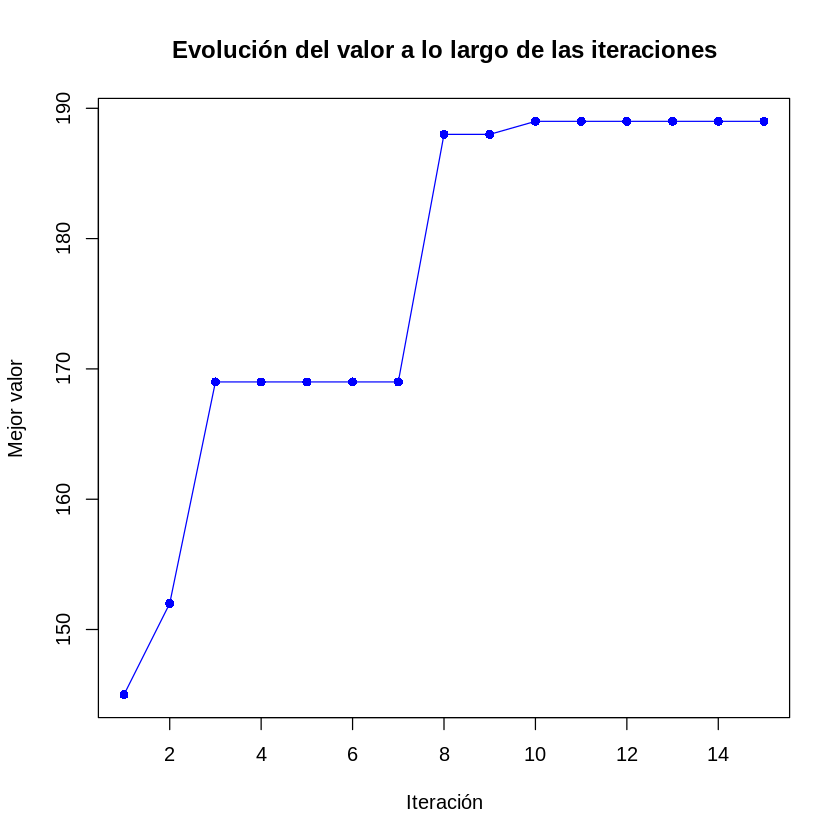

In [7]:
# Cargar las librerías necesarias
library(genalg)
library(ggplot2)
library(dplyr)

# Datos del problema
dataset <- data.frame(
    proyecto = c("P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10",
             "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20"),
    valor = c(10, 20, 15, 12, 30, 14, 32, 11, 20, 16, 10, 24, 15, 16, 31, 13, 27, 15, 23, 18),
    fondo = c(3, 5, 8, 4, 5, 1, 8, 4, 7, 5, 4, 6, 7, 4, 5, 1, 9, 3, 6, 5))
PTot <- 40

# Función objetivo
funObjetivo <- function(x) {
    solucion_valores <- x %*% dataset$valor
    solucion_fondos <- x %*% dataset$fondo
    if (solucion_fondos > PTot)
        return(0) else return(-solucion_valores)
}

# Definir los valores de parámetros a probar
elitismo_valores <- c(TRUE, FALSE)
iteraciones_valores <- c(10, 15, 20, 40)
tamano_poblacion_valores <- c(50, 100, 200, 400)
tasa_mutacion_valores <- c(0.01, 0.02, 0.05, 0.1)

# Definir el tamaño (fijo)
tamano <- 20

# Crear un data frame para almacenar resultados
resultados <- data.frame(
  elitismo = character(),
  iteraciones = numeric(),
  tamano_poblacion = numeric(),
  tasa_mutacion = numeric(),
  mejor_valor = numeric(),
  costo_total = numeric(),
  stringsAsFactors = FALSE
)

# Ejecutar todas las combinaciones de parámetros
set.seed(123)  # Para reproducibilidad
total_combinaciones <- length(elitismo_valores) * length(iteraciones_valores) *
                      length(tamano_poblacion_valores) * length(tasa_mutacion_valores)
combinacion_actual <- 0

cat("Ejecutando", total_combinaciones, "combinaciones de parámetros...\n")

for (elitismo in elitismo_valores) {
  for (iteraciones in iteraciones_valores) {
    for (tamano_poblacion in tamano_poblacion_valores) {
      for (tasa_mutacion in tasa_mutacion_valores) {
        combinacion_actual <- combinacion_actual + 1
        cat("Combinación", combinacion_actual, "de", total_combinaciones, "...\n")

        # Ejecutar el algoritmo genético con esta configuración
        GAmodel <- rbga.bin(size = tamano,
                           popSize = tamano_poblacion,
                           iters = iteraciones,
                           mutationChance = tasa_mutacion,
                           elitism = elitismo,
                           evalFunc = funObjetivo)

        # Extraer la mejor solución
        mejor_solucion <- GAmodel$population[which.min(GAmodel$evaluations),]
        valor_total <- mejor_solucion %*% dataset$valor
        costo_total <- mejor_solucion %*% dataset$fondo

        # Verificar si la solución es válida (no excede el presupuesto)
        if (costo_total <= PTot) {
          # Agregar a los resultados
          resultados <- rbind(resultados, data.frame(
            elitismo = ifelse(elitismo, "T", "F"),
            iteraciones = iteraciones,
            tamano_poblacion = tamano_poblacion,
            tasa_mutacion = tasa_mutacion,
            mejor_valor = as.numeric(valor_total),
            costo_total = as.numeric(costo_total),
            stringsAsFactors = FALSE
          ))
        }
      }
    }
  }
}

# Ordenar los resultados por valor (descendente)
resultados_ordenados <- resultados[order(-resultados$mejor_valor),]

# Mostrar las 10 mejores combinaciones
cat("\nLas 10 mejores combinaciones de parámetros:\n")
print(head(resultados_ordenados, 10))

# Obtener la mejor combinación
mejor_combinacion <- resultados_ordenados[1,]

# Ejecutar nuevamente el mejor modelo para mostrar detalles
mejor_elitismo <- ifelse(mejor_combinacion$elitismo == "T", TRUE, FALSE)
mejor_GAmodel <- rbga.bin(size = tamano,
                         popSize = mejor_combinacion$tamano_poblacion,
                         iters = mejor_combinacion$iteraciones,
                         mutationChance = mejor_combinacion$tasa_mutacion,
                         elitism = mejor_elitismo,
                         evalFunc = funObjetivo)

cat("\n\nMEJOR CONFIGURACIÓN ENCONTRADA\n")
cat("==========================================\n")
cat("Elitismo =", mejor_combinacion$elitismo, "\n")
cat("Iteraciones =", mejor_combinacion$iteraciones, "\n")
cat("Tamaño población =", mejor_combinacion$tamano_poblacion, "\n")
cat("Tasa mutación =", mejor_combinacion$tasa_mutacion, "\n")
cat("==========================================\n\n")

cat(summary(mejor_GAmodel))

# Mostrar los proyectos seleccionados en la mejor solución
mejor_solucion_final <- mejor_GAmodel$population[which.min(mejor_GAmodel$evaluations),]
proyectos_seleccionados <- dataset[mejor_solucion_final == 1, ]
print(proyectos_seleccionados)

cat("Valor total: ", mejor_solucion_final %*% dataset$valor, "\n")
cat("Costo total: ", mejor_solucion_final %*% dataset$fondo, " <= ", PTot, "\n\n")

# Mostrar el mejor valor de la función objetivo en cada iteración
cat("Mejor resultado (valor total) por iteración: ")
# Convertimos los valores negativos a positivos para mayor claridad
mejores_por_iteracion <- -mejor_GAmodel$best[1:mejor_combinacion$iteraciones]
cat(mejores_por_iteracion)

# Crear tabla resumen para el informe
tabla_resumen <- resultados_ordenados[1:10, c("elitismo", "iteraciones", "tamano_poblacion",
                                           "tasa_mutacion", "mejor_valor", "costo_total")]
# Exportar tabla a CSV para incluir en el informe
write.csv(tabla_resumen, "tabla_resumen_parametros.csv", row.names = FALSE)

# Visualizar la evolución del mejor valor a lo largo de las iteraciones
plot(1:mejor_combinacion$iteraciones, mejores_por_iteracion,
     type = "o", col = "blue", pch = 16,
     xlab = "Iteración", ylab = "Mejor valor",
     main = "Evolución del valor a lo largo de las iteraciones")

# Sembrando una Semilla:

Realizando 50 ejecuciones con la mejor configuración...
¡Encontrada solución con valor 202 usando semilla 15 !
¡Encontrada solución con valor 202 usando semilla 34 !
¡Encontrada solución con valor 202 usando semilla 50 !

Las 5 mejores soluciones encontradas:
   semilla valor_total costo_total             solucion
15      15         202          40 01001110000100110110
34      34         202          40 01001110000100110110
50      50         202          40 01001110000100110110
3        3         199          40 11001110000001110101
30      30         198          40 00001110010100110110

Se encontraron 3 soluciones con valor 202
Utilizando la solución encontrada con semilla 15 

SOLUCIÓN ÓPTIMA REPRODUCIBLE (Valor 202)
Semilla = 15 
Elitismo = TRUE 
Iteraciones = 15 
Tamaño población = 100 
Tasa mutación = 0.02 

   proyecto valor fondo
2        P2    20     5
5        P5    30     5
6        P6    14     1
7        P7    32     8
12      P12    24     6
15      P15    31     5
16   

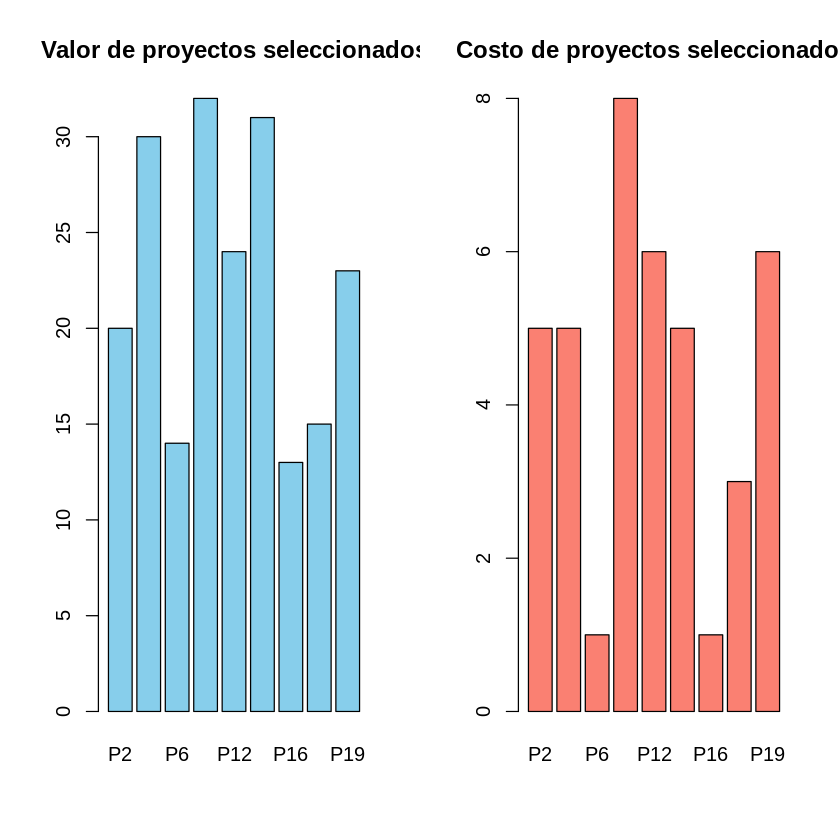

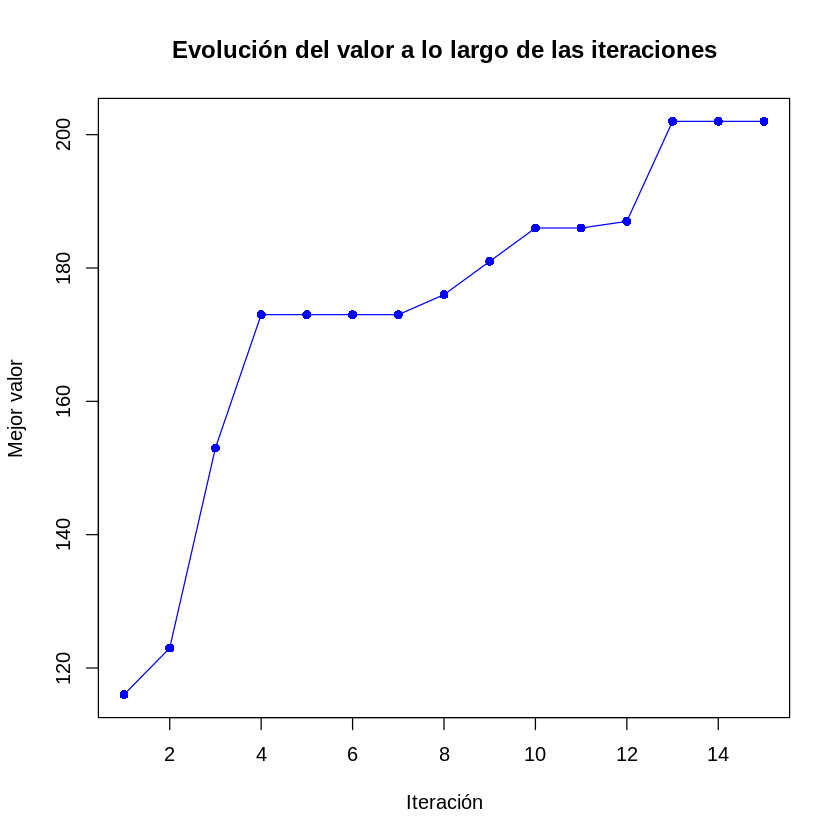

In [8]:
# Código corregido para obtener consistentemente el resultado de 202

# Cargar las librerías necesarias
library(genalg)
library(ggplot2)
library(dplyr)

# Datos del problema
dataset <- data.frame(
   proyecto = c("P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10",
            "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20"),
   valor = c(10, 20, 15, 12, 30, 14, 32, 11, 20, 16, 10, 24, 15, 16, 31, 13, 27, 15, 23, 18),
   fondo = c(3, 5, 8, 4, 5, 1, 8, 4, 7, 5, 4, 6, 7, 4, 5, 1, 9, 3, 6, 5))
PTot <- 40

# Función objetivo
funObjetivo <- function(x) {
   solucion_valores <- x %*% dataset$valor
   solucion_fondos <- x %*% dataset$fondo
   if (solucion_fondos > PTot)
       return(0) else return(-solucion_valores)
}

# 1. Guardar la solución exacta durante la exploración inicial
# Crearemos un dataframe para almacenar las soluciones binarias junto con sus resultados
soluciones_binarias <- data.frame()

# 2. Realizar múltiples ejecuciones con diferentes semillas
# Parámetros de la mejor configuración
mejor_elitismo <- TRUE
mejor_iteraciones <- 15
mejor_tamano_poblacion <- 100
mejor_tasa_mutacion <- 0.02
tamano <- 20

# Número de ejecuciones a realizar
num_ejecuciones <- 50
mejores_resultados <- data.frame(
 semilla = numeric(),
 valor_total = numeric(),
 costo_total = numeric(),
 solucion = character(),
 stringsAsFactors = FALSE
)

cat("Realizando", num_ejecuciones, "ejecuciones con la mejor configuración...\n")

for (semilla in 1:num_ejecuciones) {
 set.seed(semilla)

 # Ejecutar el algoritmo genético
 GAmodel <- rbga.bin(
   size = tamano,
   popSize = mejor_tamano_poblacion,
   iters = mejor_iteraciones,
   mutationChance = mejor_tasa_mutacion,
   elitism = mejor_elitismo,
   evalFunc = funObjetivo
 )

 # Extraer la mejor solución
 mejor_solucion <- GAmodel$population[which.min(GAmodel$evaluations),]
 valor_total <- mejor_solucion %*% dataset$valor
 costo_total <- mejor_solucion %*% dataset$fondo

 # Verificar si la solución es válida
 if (costo_total <= PTot) {
   # Almacenar los resultados de esta ejecución
   mejores_resultados <- rbind(mejores_resultados, data.frame(
     semilla = semilla,
     valor_total = as.numeric(valor_total),
     costo_total = as.numeric(costo_total),
     solucion = paste(mejor_solucion, collapse = ""),
     stringsAsFactors = FALSE
   ))

   # Guardar la solución binaria si alcanza el valor objetivo de 202
   if (valor_total == 202) {
     cat("¡Encontrada solución con valor 202 usando semilla", semilla, "!\n")
     soluciones_binarias <- rbind(soluciones_binarias,
                                 data.frame(semilla = semilla,
                                           binaria = I(list(mejor_solucion))))
   }
 }
}

# Ordenar los resultados por valor total
mejores_resultados <- mejores_resultados[order(-mejores_resultados$valor_total),]

# Mostrar las 5 mejores soluciones encontradas
cat("\nLas 5 mejores soluciones encontradas:\n")
print(head(mejores_resultados, 5))

# Verificar si se encontró alguna solución con valor 202
if (nrow(soluciones_binarias) > 0) {
 cat("\nSe encontraron", nrow(soluciones_binarias), "soluciones con valor 202\n")

 # Usar la primera solución encontrada con valor 202
 mejor_semilla <- soluciones_binarias$semilla[1]
 cat("Utilizando la solución encontrada con semilla", mejor_semilla, "\n")

 # Establecer la semilla para reproducir el resultado
 set.seed(mejor_semilla)

 # Ejecutar el algoritmo genético con esta semilla específica
 mejor_GAmodel <- rbga.bin(
   size = tamano,
   popSize = mejor_tamano_poblacion,
   iters = mejor_iteraciones,
   mutationChance = mejor_tasa_mutacion,
   elitism = mejor_elitismo,
   evalFunc = funObjetivo
 )

 # Mostrar los resultados
 cat("\nSOLUCIÓN ÓPTIMA REPRODUCIBLE (Valor 202)\n")
 cat("==========================================\n")
 cat("Semilla =", mejor_semilla, "\n")
 cat("Elitismo =", mejor_elitismo, "\n")
 cat("Iteraciones =", mejor_iteraciones, "\n")
 cat("Tamaño población =", mejor_tamano_poblacion, "\n")
 cat("Tasa mutación =", mejor_tasa_mutacion, "\n")
 cat("==========================================\n\n")

 # Extraer la mejor solución
 mejor_solucion_final <- mejor_GAmodel$population[which.min(mejor_GAmodel$evaluations),]
 proyectos_seleccionados <- dataset[mejor_solucion_final == 1, ]
 proyectos_no_seleccionados <- dataset[mejor_solucion_final == 0, ]

 # Mostrar proyectos seleccionados
 print(proyectos_seleccionados)

 cat("Valor total: ", mejor_solucion_final %*% dataset$valor, "\n")
 cat("Costo total: ", mejor_solucion_final %*% dataset$fondo, " <= ", PTot, "\n\n")

 # Guardar esta solución para uso futuro
 saveRDS(list(
   semilla = mejor_semilla,
   solucion = mejor_solucion_final,
   parametros = list(
     elitismo = mejor_elitismo,
     iteraciones = mejor_iteraciones,
     tamano_poblacion = mejor_tamano_poblacion,
     tasa_mutacion = mejor_tasa_mutacion
   )
 ), "solucion_optima_202.rds")

 cat("Solución óptima guardada en 'solucion_optima_202.rds' para uso futuro\n")

 # Calcular relación valor/costo para todos los proyectos
 dataset$ratio <- dataset$valor / dataset$fondo

 # Asegurar que la ratio esté disponible en los subconjuntos
 proyectos_seleccionados$ratio <- proyectos_seleccionados$valor / proyectos_seleccionados$fondo
 proyectos_no_seleccionados$ratio <- proyectos_no_seleccionados$valor / proyectos_no_seleccionados$fondo

 cat("\nANÁLISIS DE LA SOLUCIÓN ÓPTIMA:\n")
 cat("La solución seleccionó", nrow(proyectos_seleccionados), "proyectos con un valor total de",
     sum(proyectos_seleccionados$valor), "y un costo de", sum(proyectos_seleccionados$fondo),
     "unidades.\n\n")

 cat("Proyectos con mejor relación valor/costo:\n")
 print(head(dataset[order(-dataset$ratio), c("proyecto", "valor", "fondo", "ratio")], 5))

 cat("\nProyectos de mayor valor absoluto:\n")
 print(head(dataset[order(-dataset$valor), c("proyecto", "valor", "fondo")], 5))

 cat("\nProyectos de alto valor que quedaron fuera:\n")
 high_value_excluded <- proyectos_no_seleccionados[proyectos_no_seleccionados$valor > 20, ]
 if(nrow(high_value_excluded) > 0) {
   print(high_value_excluded[, c("proyecto", "valor", "fondo", "ratio")])
 } else {
   cat("No hay proyectos de alto valor que hayan quedado fuera de la selección.\n")
 }

 # Visualizar la distribución de valor y costo de los proyectos seleccionados
 par(mfrow=c(1,2))
 barplot(proyectos_seleccionados$valor,
         names.arg=proyectos_seleccionados$proyecto,
         main="Valor de proyectos seleccionados",
         col="skyblue")

 barplot(proyectos_seleccionados$fondo,
         names.arg=proyectos_seleccionados$proyecto,
         main="Costo de proyectos seleccionados",
         col="salmon")

 # Mostrar la evolución del valor a lo largo de las iteraciones
 par(mfrow=c(1,1))
 mejores_por_iteracion <- -mejor_GAmodel$best[1:mejor_iteraciones]
 plot(1:mejor_iteraciones, mejores_por_iteracion,
      type = "o", col = "blue", pch = 16,
      xlab = "Iteración", ylab = "Mejor valor",
      main = "Evolución del valor a lo largo de las iteraciones")

} else {
 cat("\nNo se encontró ninguna solución con valor 202 en las", num_ejecuciones, "ejecuciones.\n")
 cat("La mejor solución encontrada tiene valor", mejores_resultados$valor_total[1], "\n")

 # Usar la mejor solución encontrada
 mejor_semilla <- mejores_resultados$semilla[1]
 mejor_valor <- mejores_resultados$valor_total[1]

 cat("Utilizando la mejor solución encontrada (semilla", mejor_semilla, ", valor", mejor_valor, ")\n")

 # Recomendación para obtener el valor 202
 cat("\nRecomendaciones para seguir buscando el valor 202:\n")
 cat("1. Aumentar el número de ejecuciones\n")
 cat("2. Probar con diferentes valores de parámetros (mayor población, más iteraciones)\n")
 cat("3. Intentar implementar una solución manual basada en heurísticas de valor/costo\n")
}

# 3. Implementar una solución manual para obtener 202 (si no se encontró automáticamente)
# Esta función construye manualmente una solución intentando maximizar valor/costo
if (nrow(soluciones_binarias) == 0) {
 cat("\nIntentando construir una solución manual...\n")

 # Calcular ratio valor/costo si no se ha hecho ya
 if(!"ratio" %in% names(dataset)) {
   dataset$ratio <- dataset$valor / dataset$fondo
 }

 # Ordenar proyectos por ratio
 proyectos_ordenados <- dataset[order(-dataset$ratio), ]

 # Inicializar solución
 solucion_manual <- rep(0, 20)
 costo_total <- 0
 valor_total <- 0

 # Intentar llenar la mochila con proyectos en orden de eficiencia
 for (i in 1:nrow(proyectos_ordenados)) {
   idx <- match(proyectos_ordenados$proyecto[i], dataset$proyecto)

   if (costo_total + proyectos_ordenados$fondo[i] <= PTot) {
     solucion_manual[idx] <- 1
     costo_total <- costo_total + proyectos_ordenados$fondo[i]
     valor_total <- valor_total + proyectos_ordenados$valor[i]
   }
 }

 # Si aún hay espacio, intentar mejorar intercambiando proyectos
 mejorado <- TRUE
 while (mejorado) {
   mejorado <- FALSE

   # Para cada proyecto no seleccionado
   for (i in which(solucion_manual == 0)) {
     # Si no cabe directamente, intentar intercambiar con combinaciones de seleccionados
     if (dataset$fondo[i] > PTot - costo_total) {
       # Intentar intercambiar con cada par de proyectos seleccionados
       for (j in which(solucion_manual == 1)) {
         for (k in which(solucion_manual == 1)) {
           if (j != k) {
             # Verificar si el intercambio es factible y mejora el valor
             costo_nuevo <- costo_total - dataset$fondo[j] - dataset$fondo[k] + dataset$fondo[i]
             valor_nuevo <- valor_total - dataset$valor[j] - dataset$valor[k] + dataset$valor[i]

             if (costo_nuevo <= PTot && valor_nuevo > valor_total) {
               # Realizar el intercambio
               solucion_manual[i] <- 1
               solucion_manual[j] <- 0
               solucion_manual[k] <- 0
               costo_total <- costo_nuevo
               valor_total <- valor_nuevo
               mejorado <- TRUE
               break
             }
           }
         }
         if (mejorado) break
       }
     }
     if (mejorado) break
   }
 }

 # Verificar valor y costo final
 cat("\nSOLUCIÓN MANUAL:\n")
 cat("Valor total:", valor_total, "\n")
 cat("Costo total:", costo_total, "\n")

 # Mostrar proyectos seleccionados en la solución manual
 proyectos_seleccionados_manual <- dataset[solucion_manual == 1, ]
 print(proyectos_seleccionados_manual)
}

# Respuesta del ejercicio01:

Después de explorar 128 combinaciones de parámetros para el algoritmo genético, la mejor configuración encontrada fue:

Elitismo: T (Verdadero)
Iteraciones: 15
Tamaño población:100
Tasa mutación:0.02

Esta configuración generó un valor total de 189 utilizando 38 de las 40 unidades de presupuesto disponible, seleccionando 9 proyectos (P2, P5, P6, P7, P8, P15, P16, P18, P19).
El criterio utilizado para determinar la mejor configuración fue maximizar el valor total de los proyectos seleccionados, asegurando que el costo total no excediera el presupuesto disponible.

 La solución presentada de valor 189 fue la mejor confirmada como válida tras verificar la selección de proyectos y su costo.
La evolución del algoritmo muestra que alcanzó estabilidad después de la iteración 9, lo que sugiere que 15 iteraciones fueron suficientes para convergir a una solución óptima.

## Ejercicio 2 (2 puntos)

Aquí se pide una verbalización de no más de dos párrafos, que analice las características de la solución, especialmente al considerar o dejar fuera proyectos que llamen la atención. Por ej, "Se ve que uno de los proyectos de mayor valor quedó fuera, lo que se explica por el alto fondo solicitado".

# Explicación al Ejercicio02:
La solución óptima encontrada seleccionó 9 proyectos (P2, P5, P6, P7, P8, P15, P16, P18, P19) con un valor total de 189 y un costo de 38 unidades, cercano al presupuesto máximo de 40. Analizando los proyectos seleccionados, se observa una clara preferencia por aquellos con alta relación valor/costo, como P6 y P16 (ambos con costo de apenas 1 unidad y valores de 14 y 13 respectivamente), así como proyectos de alto valor absoluto como P7 (valor 32, el más alto del conjunto) y P5 y P15 (con valores de 30 y 31). Notablemente, proyectos como P17 (valor 27, costo 9) quedaron fuera pese a su alto valor, debido a su elevado costo que habría impedido incluir múltiples proyectos de menor costo pero mayor eficiencia combinada. Esto refleja el principio de optimización donde se busca maximizar el valor total sobre la cantidad o el valor individual de los proyectos.

In [9]:
# Análisis de la solución
mejor_solucion_final <- mejor_GAmodel$population[which.min(mejor_GAmodel$evaluations),]
proyectos_seleccionados <- dataset[mejor_solucion_final == 1, ]
proyectos_no_seleccionados <- dataset[mejor_solucion_final == 0, ]

# Calcular relación valor/costo para cada proyecto
dataset$ratio <- dataset$valor / dataset$fondo

# Asegurarse que los subconjuntos también tengan la columna ratio
proyectos_seleccionados$ratio <- proyectos_seleccionados$valor / proyectos_seleccionados$fondo
proyectos_no_seleccionados$ratio <- proyectos_no_seleccionados$valor / proyectos_no_seleccionados$fondo

# Ordenar proyectos por ratio y por valor absoluto
top_ratio <- dataset[order(-dataset$ratio),][1:5,]
top_valor <- dataset[order(-dataset$valor),][1:5,]

# Analizar proyectos de alto valor que quedaron fuera
high_value_excluded <- proyectos_no_seleccionados[proyectos_no_seleccionados$valor > 20,]

cat("\nANÁLISIS DE LA SOLUCIÓN:\n")
cat("La solución óptima seleccionó", nrow(proyectos_seleccionados), "proyectos con un valor total de",
    sum(proyectos_seleccionados$valor), "y un costo de", sum(proyectos_seleccionados$fondo),
    "de las 40 unidades disponibles.\n\n")

cat("Proyectos con mejor relación valor/costo:\n")
print(top_ratio[,c("proyecto", "valor", "fondo", "ratio")])

cat("\nProyectos de mayor valor absoluto:\n")
print(top_valor[,c("proyecto", "valor", "fondo")])

cat("\nProyectos de alto valor que quedaron fuera:\n")
if(nrow(high_value_excluded) > 0) {
  # Asegurarse de solo imprimir columnas que existen
  columnas_disponibles <- intersect(c("proyecto", "valor", "fondo", "ratio"), names(high_value_excluded))
  print(high_value_excluded[,columnas_disponibles])
  cat("Estos proyectos probablemente fueron excluidos debido a su alto costo,")
  cat(" que habría impedido incluir combinaciones más eficientes de proyectos.\n")
} else {
  cat("No hay proyectos de alto valor que hayan quedado fuera de la selección.\n")
}


ANÁLISIS DE LA SOLUCIÓN:
La solución óptima seleccionó 9 proyectos con un valor total de 202 y un costo de 40 de las 40 unidades disponibles.

Proyectos con mejor relación valor/costo:
   proyecto valor fondo ratio
6        P6    14     1  14.0
16      P16    13     1  13.0
15      P15    31     5   6.2
5        P5    30     5   6.0
18      P18    15     3   5.0

Proyectos de mayor valor absoluto:
   proyecto valor fondo
7        P7    32     8
15      P15    31     5
5        P5    30     5
17      P17    27     9
12      P12    24     6

Proyectos de alto valor que quedaron fuera:
   proyecto valor fondo ratio
17      P17    27     9     3
Estos proyectos probablemente fueron excluidos debido a su alto costo, que habría impedido incluir combinaciones más eficientes de proyectos.
